# Shapelet Transform Runtime

This script must be run from the same directory as the scripts which it imports.

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pyts.transformation import ShapeletTransform

%run sys_configs.ipynb

In [2]:
with open('data/train.npy', 'rb') as f:
    x_train = np.load(f)
    y_train = np.load(f)
sz, dim = x_train.shape[1:]
      
N_train = len(y_train)

### Train data size vs compute times

Shapelets transforms are the most computationally expensive of the techniques we will study in this work. We first explore with a small experiment how the train size affects the compute time.

In [3]:
sizes = np.arange(10, 100, step = 2)

In [4]:
fit_times = []

for s in tqdm(sizes, desc = "Fitting Shapelet Transform Model: "):
    start_time = time.time()
    st_example = ShapeletTransform(n_shapelets = 10, window_sizes=[5], criterion = "anova", remove_similar = True, verbose = 0)
    st_example.fit(x_train[:s, :, 0], y_train[:s]) # Use the x-component of the acceleration; the component is not important.
    
    t = time.time() - start_time
    fit_times.append(t) 

Fitting Shapelet Transform Model: 100%|████████████████████████████████████████████████| 45/45 [07:38<00:00, 10.19s/it]


In [11]:
burn = 1

In [12]:
sizes = sizes[burn:]
fit_times = fit_times[burn:]

In [22]:
# Fit a quadratic curve (2nd degree polynomial) to the data. We will overlay this onto the plot.
coefficients = np.polyfit(sizes, fit_times, 2)
quadratic_fit = np.polyval(coefficients, sizes)

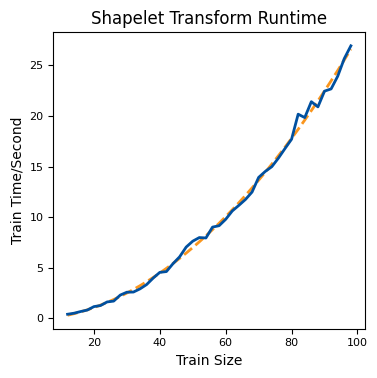

In [30]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(sizes, quadratic_fit, color=scale_rgb(COLOURS.get("accent-orange")), linestyle="--", linewidth=2)
ax.plot(sizes, fit_times, color=scale_rgb(COLOURS.get("primary-color")), linewidth=2)

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.title("Shapelet Transform Runtime", size = 12)
ax.set_xlabel("Train Size", size = 10)
ax.set_ylabel("Train Time/Second", size = 10)
fig.tight_layout()
plt.savefig('ShapeletRuntime.pdf', dpi = 1000, format = 'pdf', bbox_inches = 'tight')
plt.show()

The train data size is $\approx 4,000 = 40 x 100$. Therefore the projected runtime is $25*40^{2}$ = $40,000$ seconds $\approx 11$ hours. We therefore choose a sample from our train dataset such that the cumulative train time can be kept to a reasonable time.